In [14]:
# import cv2
# import pandas as pd
# import collections


# # Ensure you're working with a copy of the DataFrame slice
# def ETGaze2Video(video_path, eye_data, dtype='gaze',output_video="pilot2/processed/output_with_gaze.mp4"):
#     columns = [f'{dtype}L_X', f'{dtype}L_Y', f'{dtype}L_Z',
#               f'{dtype}R_X', f'{dtype}R_Y', f'{dtype}R_Z']
#     # Now, you can safely modify gaze_data
#     # eye_data[['pupilLSensorPosR_X', 'pupilLSensorPosR_Y']] = eye_data[['pupilLSensorPosR_X', 'pupilLSensorPosR_Y']].interpolate()
#     eye_data = eye_data.copy()
#     eye_data[columns] = eye_data[columns].interpolate(method='linear', limit_direction='both')

#     # Check for any remaining NaN values after interpolation
#     # eye_data[['pupilLSensorPosR_X', 'pupilLSensorPosR_Y']] = eye_data[['pupilLSensorPosR_X', 'pupilLSensorPosR_Y']].fillna(0.5) #########
#     eye_data['normalized_Unitytime'] = eye_data.groupby('Scene')['Unitytime'].transform(lambda x: x - x.min())

#     # Initialize video capture and writer
#     cap = cv2.VideoCapture(video_path)
#     fps = int(cap.get(cv2.CAP_PROP_FPS))  # Frames per second of the video
#     frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
#     frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

#     # Set target resolution for output video
#     # target_width, target_height = 1920, 1080  # Example resolution
#     target_width, target_height = 1920, 1080  # Example resolution
    

#     # Initialize VideoWriter with target resolution
#     out = cv2.VideoWriter(output_video, cv2.VideoWriter_fourcc(*'mp4v'), fps, (target_width, target_height))

#     # Scale factor for Vive Pro Eye resolution to target video resolution
#     # vive_width, vive_height = 2880, 1600  # Original Vive resolution
#     # scale_x = target_width / vive_width
#     # scale_y = target_height / vive_height

#     # Convert normalized Unitytime to frame indices
#     maxlen = 30 ##Length of previous data shown
#     eye_data['frame_idx'] = (eye_data['normalized_Unitytime'] * fps).astype(int)
#     gaze_buffer_L = collections.deque(maxlen=maxlen)
#     gaze_buffer_R = collections.deque(maxlen=maxlen)
#     gaze_buffer_T = collections.deque(maxlen=maxlen)
    
#     # Iterate over each frame of the video
#     frame_idx = 0
#     while cap.isOpened():
#         ret, frame = cap.read()
#         if not ret:
#             print(f"Failed to read frame {frame_idx}")
#             break
#         if frame is None:
#             print(f"Frame {frame_idx} is None!")
#             continue
#         # Resize the frame to match the target resolution (if necessary)
#         if frame_width != target_width or frame_height != target_height:
#             frame = cv2.resize(frame, (target_width, target_height))

#         # Retrieve gaze data for the current frame
#         gaze_data = eye_data[eye_data['frame_idx'] == frame_idx]

#         if not gaze_data.empty:
#             # Extract and scale gaze coordinates (already in 2880x1600 space)
#             x_L, y_L = gaze_data[f'{dtype}L_X'].mean(), gaze_data[f'{dtype}L_Y'].mean()
#             x_R, y_R = gaze_data[f'{dtype}R_X'].mean(), gaze_data[f'{dtype}R_Y'].mean()

#             # Convert normalized gaze points to pixel positions
#             x_L, y_L = int(x_L * target_width), int(y_L * target_height)  # Left eye (1440x1600)
#             x_R, y_R = int(x_R * target_width), int(y_R * target_height)  # Right eye (shifted by 1440)
#             x_T, y_T = (x_L + x_R) // 2, (y_L + y_R) // 2  # Combined gaze point

#             # Append gaze points to buffers
#             if 0 <= x_L < target_width and 0 <= y_L < target_height:
#                 gaze_buffer_L.append((x_L, y_L))
#             if 0 <= x_R < target_width and 0 <= y_R < target_height:
#                 gaze_buffer_R.append((x_R, y_R))
#             if 0 <= x_T < target_width and 0 <= y_T < target_height:
#                 gaze_buffer_T.append((x_T, y_T))

#         # Draw gaze points with fading effect
#         overlay = frame.copy()
#         for i, (gx, gy) in enumerate(gaze_buffer_L):  # Left eye (Red)
#             alpha = (i + 1) / 30 * 0.5
#             color = (0, 0, int(255 * alpha))
#             cv2.circle(overlay, (gx, gy), 5, color, -1)
#         for i, (gx, gy) in enumerate(gaze_buffer_R):  # Right eye (Green)
#             alpha = (i + 1) / 30 * 0.5
#             color = (0, int(255 * alpha), 0)
#             cv2.circle(overlay, (gx, gy), 5, color, -1)
#         for i, (gx, gy) in enumerate(gaze_buffer_T):  # Combined gaze (Blue)
#             alpha = (i + 1) / 30 * 0.5
#             color = (int(255 * alpha), 0, 0)
#             cv2.circle(overlay, (gx, gy), 5, color, -1)

#         # Combine overlay and original frame
#         frame = cv2.addWeighted(overlay, 0.5, frame, 0.5, 0)

#         # Highlight the latest gaze points
#         if gaze_buffer_L:
#             cv2.circle(frame, gaze_buffer_L[-1], 7, (0, 0, 255), -1)  # Left eye
#         if gaze_buffer_R:
#             cv2.circle(frame, gaze_buffer_R[-1], 7, (0, 255, 0), -1)  # Right eye
#         if gaze_buffer_T:
#             cv2.circle(frame, gaze_buffer_T[-1], 7, (255, 0, 0), -1)  # Combined

#         # Write the frame to the output video
#         out.write(frame)
#         frame_idx += 1

#     # Release resources
#     cap.release()
#     out.release()
    
    

In [11]:
# def project_gaze_to_2d(gaze_origin, gaze_vector, convergence_distance, screen_width, screen_height, screen_mm_width, screen_mm_height):
#     """
#     Project a 3D gaze vector onto a 2D screen plane using the convergence distance.
#     Normalizes the result and converts to screen pixel coordinates.
#     """
#     if convergence_distance is None or math.isnan(convergence_distance):
#         convergence_distance = 10000
    
    
#     # Calculate the 3D landing point based on gaze origin, direction, and convergence distance
#     landing_x = gaze_origin[0] + gaze_vector[0] * convergence_distance
#     landing_y = gaze_origin[1] + gaze_vector[1] * convergence_distance
#     landing_z = gaze_origin[2] + gaze_vector[2] * convergence_distance

#     # Convert the 3D landing point (in mm) to normalized screen coordinates (0-1)
#     normalized_x = (landing_x + (screen_mm_width / 2)) / screen_mm_width
#     normalized_y = 1 - ((landing_y + (screen_mm_height / 2)) / screen_mm_height)  # Flip Y-axis for top-left origin

#     # Clamp to ensure the points remain within the screen boundaries
#     normalized_x = np.clip(normalized_x, 0, 1)
#     normalized_y = np.clip(normalized_y, 0, 1)

#     # Convert normalized coordinates to pixel coordinates
#     pixel_x = int(normalized_x * screen_width)
#     pixel_y = int(normalized_y * screen_height)

#     return pixel_x, pixel_y

In [9]:
# import cv2
# import numpy as np
# import collections
# import math

# def calculate_convergence_distance(left_eye, left_gaze, right_eye, right_gaze):
#     """
#     Calculate the convergence distance based on binocular eye-tracking data.


#     Parameters:
#         left_eye (numpy array): 3D position of the left eye [x, y, z].
#         left_gaze (numpy array): 3D normalized gaze direction vector of the left eye [dx, dy, dz].
#         right_eye (numpy array): 3D position of the right eye [x, y, z].
#         right_gaze (numpy array): 3D normalized gaze direction vector of the right eye [dx, dy, dz].

#     Returns:
#         float: Convergence distance (distance from the midpoint of the eyes to the convergence point).
#         numpy array: Convergence point in 3D space [x, y, z].
#     """
#     left_eye = np.array(left_eye)
#     left_gaze = np.array(left_gaze)
#     right_eye = np.array(right_eye)
#     right_gaze = np.array(right_gaze)
    
#     # Ensure the gaze vectors are normalized
#     left_gaze = left_gaze / np.linalg.norm(left_gaze)
#     right_gaze = right_gaze / np.linalg.norm(right_gaze)

#     # Define variables for solving the closest point between lines
#     p1 = left_eye
#     d1 = left_gaze
#     p2 = right_eye
#     d2 = right_gaze

#     # Compute cross-product and denominator
#     d1_cross_d2 = np.cross(d1, d2)
#     denom = np.linalg.norm(d1_cross_d2) ** 2

#     if denom < 1e-6:
#         # If the gaze lines are nearly parallel
#         print("Gaze vectors are nearly parallel; convergence point may be inaccurate.")
#         return None, None

#     # Calculate the closest points on the two lines
#     t = np.dot(np.cross((p2 - p1), d2), d1_cross_d2) / denom
#     s = np.dot(np.cross((p2 - p1), d1), d1_cross_d2) / denom

#     # Points on the lines
#     closest_point_left = p1 + t * d1
#     closest_point_right = p2 + s * d2

#     # Midpoint between the closest points (approximate convergence point)
#     convergence_point = (closest_point_left + closest_point_right) / 2

#     # Calculate convergence distance
#     eye_midpoint = (p1 + p2) / 2
#     convergence_distance = np.linalg.norm(convergence_point - eye_midpoint)

#     return convergence_distance, convergence_point
# def project_gaze_to_2d(gaze_origin, gaze_vector, screen_width, screen_height, screen_mm_width, screen_mm_height):
#     """
#     Project a 3D gaze vector onto a 2D screen plane (z = 0).
#     This function calculates the intersection of the gaze ray with the screen plane
#     and converts it to screen pixel coordinates.

#     Parameters:
#         gaze_origin (array): 3D coordinates of the gaze ray origin [x, y, z].
#         gaze_vector (array): 3D direction vector of the gaze ray [dx, dy, dz].
#         screen_width (int): Width of the screen in pixels.
#         screen_height (int): Height of the screen in pixels.
#         screen_mm_width (float): Width of the screen in millimeters.
#         screen_mm_height (float): Height of the screen in millimeters.

#     Returns:
#         (int, int): Pixel coordinates of the projected gaze point on the screen.
#     """
#     # Ensure gaze vector is a numpy array
#     gaze_vector = np.array(gaze_vector, dtype=float)

#     # Handle the case of a zero-length gaze vector
#     norm = np.linalg.norm(gaze_vector)
#     if norm == 0:
#         print("Warning: Gaze vector has zero length; using gaze origin projection.")
#         gaze_vector = np.array([0, 0, 1])  # Default fallback vector pointing directly at the screen
#     else:
#         # Normalize the gaze vector
#         gaze_vector /= norm

#     # Calculate intersection with the screen plane (z = 0)
#     gaze_origin = np.array(gaze_origin, dtype=float)
#     if abs(gaze_vector[2]) > 1e-6:  # Avoid division by zero or near-zero values
#         t = -gaze_origin[2] / gaze_vector[2]  # Parameter t for intersection
#         landing_x = gaze_origin[0] + t * gaze_vector[0]
#         landing_y = gaze_origin[1] + t * gaze_vector[1]
#     else:
#         # Gaze is parallel to the screen plane; project directly from origin
#         print("Warning: Gaze vector is parallel to the screen plane.")
#         landing_x, landing_y = gaze_origin[0], gaze_origin[1]

#     # Convert 3D landing point (in mm) to normalized screen coordinates (0-1)
#     normalized_x = (landing_x + (screen_mm_width / 2)) / screen_mm_width
#     normalized_y = 1 - ((landing_y + (screen_mm_height / 2)) / screen_mm_height)  # Flip Y-axis

#     # Clamp normalized coordinates to [0, 1] to stay within screen bounds
#     normalized_x = np.clip(normalized_x, 0, 1)
#     normalized_y = np.clip(normalized_y, 0, 1)

#     # Convert normalized coordinates to pixel coordinates
#     pixel_x = int(normalized_x * screen_width)
#     pixel_y = int(normalized_y * screen_height)

#     return pixel_x, pixel_y


# def create_gaze_video(video_path, eye_data, output_video="output_with_gaze.mp4"):
#     """
#     Create a video overlaying gaze positions projected from 3D gaze vectors onto a 2D video.
#     """
#     # Constants: screen and physical properties
#     screen_width, screen_height = 2880, 1600  # HTC Vive Pro Eye resolution
#     screen_mm_width, screen_mm_height = 89, 89  # Combined physical screen dimensions (mm)
    
#     # Load video
#     cap = cv2.VideoCapture(video_path)
#     fps = int(cap.get(cv2.CAP_PROP_FPS))
#     frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
#     frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

#     # Resize video to target screen resolution
#     out = cv2.VideoWriter(output_video, cv2.VideoWriter_fourcc(*'mp4v'), fps, (screen_width, screen_height))

#     # Normalize time and assign frame indices
#     eye_data = eye_data.copy().interpolate(method='linear', limit_direction='both')
#     eye_data['normalized_time'] = eye_data['UnityTime'] - eye_data['UnityTime'].min()
#     eye_data['frame_idx'] = (eye_data['normalized_time'] * fps).astype(int)
    
#     # Gaze buffer for smoothing
#     gaze_buffer = collections.deque(maxlen=30)

#     frame_idx = 0
#     while cap.isOpened():
#         ret, frame = cap.read()
#         if not ret:
#             break

#         # Resize the frame to match the screen resolution
#         frame = cv2.resize(frame, (screen_width, screen_height))

#         # Select gaze data for the current frame
#         gaze_data = eye_data[eye_data['frame_idx'] == frame_idx]

#         if not gaze_data.empty:
#             # Left Eye Gaze Data
#             gaze_origin_L = (
#                 gaze_data['gazeoriginL_X'].mean(),
#                 gaze_data['gazeoriginL_Y'].mean(),
#                 gaze_data['gazeoriginL_Z'].mean(),
#             )
#             gaze_vector_L = (
#                 gaze_data['gazeL_X'].mean(),
#                 gaze_data['gazeL_Y'].mean(),
#                 gaze_data['gazeL_Z'].mean(),
#             )
            
            

#             # Right Eye Gaze Data
#             gaze_origin_R = (
#                 gaze_data['gazeoriginR_X'].mean(),
#                 gaze_data['gazeoriginR_Y'].mean(),
#                 gaze_data['gazeoriginR_Z'].mean(),
#             )
#             gaze_vector_R = (
#                 gaze_data['gazeR_X'].mean(),
#                 gaze_data['gazeR_Y'].mean(),
#                 gaze_data['gazeR_Z'].mean(),
#             )
            
#             gaze_dist = gaze_data['Distance'].mean()

#             # convergence_distance, _ = calculate_convergence_distance(gaze_origin_L, gaze_vector_L, gaze_origin_R, gaze_vector_R)
#             convergence_distance = gaze_dist
            
            
            

#             # Project both eyes to 2D
#             # proj_x_L, proj_y_L = project_gaze_to_2d(gaze_origin_L, gaze_vector_L, convergence_distance, screen_width, screen_height, screen_mm_width, screen_mm_height)
#             # proj_x_R, proj_y_R = project_gaze_to_2d(gaze_origin_R, gaze_vector_R, convergence_distance, screen_width, screen_height, screen_mm_width, screen_mm_height)
#             proj_x_L, proj_y_L = project_gaze_to_2d(gaze_origin_L, gaze_vector_L, screen_width, screen_height, screen_mm_width, screen_mm_height)
#             proj_x_R, proj_y_R = project_gaze_to_2d(gaze_origin_R, gaze_vector_R, screen_width, screen_height, screen_mm_width, screen_mm_height)
#             # Combined Gaze Point (Midpoint)
#             proj_x_C = (proj_x_L + proj_x_R) // 2
#             proj_y_C = (proj_y_L + proj_y_R) // 2

#             # Draw the gaze points
#             cv2.circle(frame, (proj_x_L, proj_y_L), 10, (0, 0, 255), -1)  # Left Eye (Red)
#             cv2.circle(frame, (proj_x_R, proj_y_R), 10, (0, 255, 0), -1)  # Right Eye (Green)
#             cv2.circle(frame, (proj_x_C, proj_y_C), 10, (255, 0, 0), -1)  # Combined (Blue)

#             # Buffer for smoothing/fading effect
#             gaze_buffer.append((proj_x_C, proj_y_C))

#         # Overlay the gaze buffer for smooth effect
#         overlay = frame.copy()
#         for i, (gx, gy) in enumerate(gaze_buffer):
#             alpha = (i + 1) / len(gaze_buffer) * 0.5
#             color = (int(255 * alpha), 0, 0)
#             cv2.circle(overlay, (gx, gy), 5, color, -1)
#         frame = cv2.addWeighted(overlay, 0.5, frame, 0.5, 0)

#         out.write(frame)
#         frame_idx += 1

#     cap.release()
#     out.release()
#     print("Gaze video processing complete! Output saved as:", output_video)

In [3]:
# import cv2
# import numpy as np
# import collections
# import math
# def rescale_intrinsics(fx, fy, cx, cy, old_width, old_height, new_width, new_height):
#     # Calculate scaling factors
#     scale_x = new_width / old_width
#     scale_y = new_height / old_height
    
#     # Rescale focal lengths
#     fx_new = fx * scale_x
#     fy_new = fy * scale_y
    
#     # Rescale principal point (cx, cy)
#     cx_new = cx * scale_x
#     cy_new = cy * scale_y
    
#     return fx_new, fy_new, cx_new, cy_new


# def calculate_gaze(eye1_pos, gaze1_dir, eye2_pos, gaze2_dir, distance, fx, fy, cx, cy):
#     # Step 1: Calculate endpoints in 3D
#     endpoint1 = (
#         eye1_pos[0] + gaze1_dir[0] * distance,
#         eye1_pos[1] + gaze1_dir[1] * distance,
#         eye1_pos[2] + gaze1_dir[2] * distance
#     )
#     endpoint2 = (
#         eye2_pos[0] + gaze2_dir[0] * distance,
#         eye2_pos[1] + gaze2_dir[1] * distance,
#         eye2_pos[2] + gaze2_dir[2] * distance
#     )
    
#     # Step 2: Calculate the final gaze point (average of both eye endpoints)
#     final_gaze = (
#         (endpoint1[0] + endpoint2[0]) / 2,
#         (endpoint1[1] + endpoint2[1]) / 2,
#         (endpoint1[2] + endpoint2[2]) / 2
#     )
    
#     # Step 3: Project to 2D video space
#     def project_to_2d(point, fx, fy, cx, cy):
#         x, y, z = point
#         u = fx * (x / z) + cx
#         v = fy * (y / z) + cy
#         return (u, v)
    
#     gaze1_2d = project_to_2d(endpoint1, fx, fy, cx, cy)
#     gaze2_2d = project_to_2d(endpoint2, fx, fy, cx, cy)
#     final_gaze_2d = project_to_2d(final_gaze, fx, fy, cx, cy)
    
#     return gaze1_2d, gaze2_2d, final_gaze_2d

# def project_gaze_to_2d(gaze_origin, gaze_vector, screen_width, screen_height, screen_mm_width, screen_mm_height):
#     """
#     Project a 3D gaze vector onto a 2D screen plane (z = 0).
#     This function calculates the intersection of the gaze ray with the screen plane
#     and converts it to screen pixel coordinates.

#     Parameters:
#         gaze_origin (array): 3D coordinates of the gaze ray origin [x, y, z].
#         gaze_vector (array): 3D direction vector of the gaze ray [dx, dy, dz].
#         screen_width (int): Width of the screen in pixels.
#         screen_height (int): Height of the screen in pixels.
#         screen_mm_width (float): Width of the screen in millimeters.
#         screen_mm_height (float): Height of the screen in millimeters.

#     Returns:
#         (int, int): Pixel coordinates of the projected gaze point on the screen.
#     """
#     # Ensure gaze vector is a numpy array
#     gaze_vector = np.array(gaze_vector, dtype=float)

#     # Handle the case of a zero-length gaze vector
#     norm = np.linalg.norm(gaze_vector)
#     if norm == 0:
#         print("Warning: Gaze vector has zero length; using gaze origin projection.")
#         gaze_vector = np.array([0, 0, 1])  # Default fallback vector pointing directly at the screen
#     else:
#         # Normalize the gaze vector
#         gaze_vector /= norm

#     # Calculate intersection with the screen plane (z = 0)
#     gaze_origin = np.array(gaze_origin, dtype=float)
#     if abs(gaze_vector[2]) > 1e-6:  # Avoid division by zero or near-zero values
#         t = -gaze_origin[2] / gaze_vector[2]  # Parameter t for intersection
#         landing_x = gaze_origin[0] + t * gaze_vector[0]
#         landing_y = gaze_origin[1] + t * gaze_vector[1]
#     else:
#         # Gaze is parallel to the screen plane; project directly from origin
#         print("Warning: Gaze vector is parallel to the screen plane.")
#         landing_x, landing_y = gaze_origin[0], gaze_origin[1]

#     # Convert 3D landing point (in mm) to normalized screen coordinates (0-1)
#     normalized_x = (landing_x + (screen_mm_width / 2)) / screen_mm_width
#     normalized_y = 1 - ((landing_y + (screen_mm_height / 2)) / screen_mm_height)  # Flip Y-axis

#     # Clamp normalized coordinates to [0, 1] to stay within screen bounds
#     normalized_x = np.clip(normalized_x, 0, 1)
#     normalized_y = np.clip(normalized_y, 0, 1)

#     # Convert normalized coordinates to pixel coordinates
#     pixel_x = int(normalized_x * screen_width)
#     pixel_y = int(normalized_y * screen_height)

#     return pixel_x, pixel_y


# def create_gaze_video(video_path, eye_data, output_video="output_with_gaze.mp4"):
#     """
#     Create a video overlaying gaze positions projected from 3D gaze vectors onto a 2D video.
#     """
#     # Constants: screen and physical properties
#     # screen_width, screen_height = 2880, 1600  # HTC Vive Pro Eye resolution
#     # screen_mm_width, screen_mm_height = 89, 89  # Combined physical screen dimensions (mm)
    
#     # Example setup for binocular camera
#     old_width = 2880
#     old_height = 1600
#     new_width = 3840
#     new_height = 2160

#     # Intrinsic parameters for the binocular camera
#     fx = 1000  # Focal length in pixels (same for both eyes at original resolution)
#     fy = 1000  # Focal length in pixels (same for both eyes at original resolution)
#     cx = 1440  # Principal point in x (center of the binocular image)
#     cy = 800   # Principal point in y (center of the binocular image)

#     # Rescale intrinsics for the new resolution
#     fx_new, fy_new, cx_new, cy_new = rescale_intrinsics(fx, fy, cx, cy, old_width, old_height, new_width, new_height)
#     # Load video
#     cap = cv2.VideoCapture(video_path)
#     fps = int(cap.get(cv2.CAP_PROP_FPS))
#     frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
#     frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

#     # Resize video to target screen resolution
#     out = cv2.VideoWriter(output_video, cv2.VideoWriter_fourcc(*'mp4v'), fps, (old_width, old_height))

#     # Normalize time and assign frame indices
#     eye_data = eye_data.copy().interpolate(method='linear', limit_direction='both')
#     eye_data['normalized_time'] = eye_data['UnityTime'] - eye_data['UnityTime'].min()
#     eye_data['frame_idx'] = (eye_data['normalized_time'] * fps).astype(int)
    
#     # Gaze buffer for smoothing
#     gaze_buffer = collections.deque(maxlen=30)

#     frame_idx = 0
#     while cap.isOpened():
#         ret, frame = cap.read()
#         if not ret:
#             break

#         # Resize the frame to match the screen resolution
#         frame = cv2.resize(frame, (old_width, old_height))

#         # Select gaze data for the current frame
#         gaze_data = eye_data[eye_data['frame_idx'] == frame_idx]

#         if not gaze_data.empty:
#             # Left Eye Gaze Data
#             gaze_origin_L = (
#                 gaze_data['gazeoriginL_X'].mean(),
#                 gaze_data['gazeoriginL_Y'].mean(),
#                 gaze_data['gazeoriginL_Z'].mean(),
#             )
#             gaze_vector_L = (
#                 gaze_data['gazeL_X'].mean(),
#                 gaze_data['gazeL_Y'].mean(),
#                 gaze_data['gazeL_Z'].mean(),
#             )
            
            

#             # Right Eye Gaze Data
#             gaze_origin_R = (
#                 gaze_data['gazeoriginR_X'].mean(),
#                 gaze_data['gazeoriginR_Y'].mean(),
#                 gaze_data['gazeoriginR_Z'].mean(),
#             )
#             gaze_vector_R = (
#                 gaze_data['gazeR_X'].mean(),
#                 gaze_data['gazeR_Y'].mean(),
#                 gaze_data['gazeR_Z'].mean(),
#             )
            
#             gaze_dist = gaze_data['Distance'].mean()*1000

#             # convergence_distance, _ = calculate_convergence_distance(gaze_origin_L, gaze_vector_L, gaze_origin_R, gaze_vector_R)
#             convergence_distance = gaze_dist
            
#             gazeL_2d, gazeR_2d, final_gaze_2d = calculate_gaze(gaze_origin_L, gaze_vector_L, gaze_origin_R, gaze_vector_R, gaze_dist, fx_new, fy_new, cx_new, cy_new)
            

#             # # Project both eyes to 2D
#             # # proj_x_L, proj_y_L = project_gaze_to_2d(gaze_origin_L, gaze_vector_L, convergence_distance, screen_width, screen_height, screen_mm_width, screen_mm_height)
#             # # proj_x_R, proj_y_R = project_gaze_to_2d(gaze_origin_R, gaze_vector_R, convergence_distance, screen_width, screen_height, screen_mm_width, screen_mm_height)
#             # proj_x_L, proj_y_L = project_gaze_to_2d(gaze_origin_L, gaze_vector_L, screen_width, screen_height, screen_mm_width, screen_mm_height)
#             # proj_x_R, proj_y_R = project_gaze_to_2d(gaze_origin_R, gaze_vector_R, screen_width, screen_height, screen_mm_width, screen_mm_height)
#             # # Combined Gaze Point (Midpoint)
#             # proj_x_C = (proj_x_L + proj_x_R) // 2
#             # proj_y_C = (proj_y_L + proj_y_R) // 2

#             # Draw the gaze points
#             cv2.circle(frame, (gazeL_2d[0], gazeL_2d[1]), 10, (0, 0, 255), -1)  # Left Eye (Red)
#             cv2.circle(frame, (gazeR_2d[0], gazeR_2d[1]), 10, (0, 255, 0), -1)  # Right Eye (Green)
#             cv2.circle(frame, (final_gaze_2d[0], final_gaze_2d[1]), 10, (255, 0, 0), -1)  # Combined (Blue)

#             # Buffer for smoothing/fading effect
#             gaze_buffer.append((final_gaze_2d[0], final_gaze_2d[1]))

#         # Overlay the gaze buffer for smooth effect
#         overlay = frame.copy()
#         for i, (gx, gy) in enumerate(gaze_buffer):
#             alpha = (i + 1) / len(gaze_buffer) * 0.5
#             color = (int(255 * alpha), 0, 0)
#             cv2.circle(overlay, (gx, gy), 5, color, -1)
#         frame = cv2.addWeighted(overlay, 0.5, frame, 0.5, 0)

#         out.write(frame)
#         frame_idx += 1

#     cap.release()
#     out.release()
#     print("Gaze video processing complete! Output saved as:", output_video)

In [1]:
# import cv2
# import numpy as np
# import collections
# import math
# def rescale_intrinsics(fx, fy, cx, cy, old_width, old_height, new_width, new_height):
#     # Calculate scaling factors
#     scale_x = new_width / old_width
#     scale_y = new_height / old_height
    
#     # Rescale focal lengths
#     fx_new = fx * scale_x
#     fy_new = fy * scale_y
    
#     # Rescale principal point (cx, cy)
#     cx_new = cx * scale_x
#     cy_new = cy * scale_y
    
#     return fx_new, fy_new, cx_new, cy_new
# def calculate_gaze(eye1_pos, gaze1_dir, eye2_pos, gaze2_dir, distance, fx, fy, cx, cy):
#     # Step 1: Calculate endpoints in 3D
#     endpoint1 = (
#         eye1_pos[0] + gaze1_dir[0] * distance,
#         eye1_pos[1] + gaze1_dir[1] * distance,
#         eye1_pos[2] + gaze1_dir[2] * distance
#     )
#     endpoint2 = (
#         eye2_pos[0] + gaze2_dir[0] * distance,
#         eye2_pos[1] + gaze2_dir[1] * distance,
#         eye2_pos[2] + gaze2_dir[2] * distance
#     )
    
#     # Step 2: Calculate the final gaze point (average of both eye endpoints)
#     final_gaze = (
#         (endpoint1[0] + endpoint2[0]) / 2,
#         (endpoint1[1] + endpoint2[1]) / 2,
#         (endpoint1[2] + endpoint2[2]) / 2
#     )
    
#     # Step 3: Project to 2D video space
#     def project_to_2d(point, fx, fy, cx, cy):
#         x, y, z = point
#         if z == 0:
#             return (cx, cy)  # If z is zero, fallback to the principal point (center)
#         u = fx * (x / z) + cx
#         v = fy * (y / z) + cy
#         return (u, v)
    
#     gaze1_2d = project_to_2d(endpoint1, fx, fy, cx, cy)
#     gaze2_2d = project_to_2d(endpoint2, fx, fy, cx, cy)
#     final_gaze_2d = project_to_2d(final_gaze, fx, fy, cx, cy)

#     # Ensure gaze points are valid and convert to integers
#     gaze1_2d = (int(round(gaze1_2d[0])), int(round(gaze1_2d[1]))) if all(isinstance(i, (int, float)) for i in gaze1_2d) else (0, 0)
#     gaze2_2d = (int(round(gaze2_2d[0])), int(round(gaze2_2d[1]))) if all(isinstance(i, (int, float)) for i in gaze2_2d) else (0, 0)
#     final_gaze_2d = (int(round(final_gaze_2d[0])), int(round(final_gaze_2d[1]))) if all(isinstance(i, (int, float)) for i in final_gaze_2d) else (0, 0)

#     return gaze1_2d, gaze2_2d, final_gaze_2d


# def create_gaze_video(video_path, eye_data, output_video="output_with_gaze.mp4"):
#     # Constants: screen and physical properties
#     # old_width = 2880
#     # old_height = 1600
#     # new_width = 1920
#     # new_height = 1080
#     old_width = 2880
#     old_height = 1600
#     new_width = 3840
#     new_height = 2160
    
#     # HTC Vive Pro Eye sensor dimensions (in mm)
#     sensor_width = 78.7  # mm (estimated)
#     sensor_height = 43.2  # mm (estimated)
    
#     # Resolution (per eye)
#     resolution_width = 1440  # per eye
#     resolution_height = 1600  # per eye

#     # Focal length calculation based on the sensor size and resolution
#     fx = (resolution_width / sensor_width) * 50  # mm focal length (approximate based on the sensor size)
#     fy = (resolution_height / sensor_height) * 50  # mm focal length (approximate based on the sensor size)

#     # Principal point (assuming it's at the center of the image)
#     cx = old_width // 2  # Principal point in x (center of the HMD image)
#     cy = old_height // 2  # Principal point in y (center of the HMD image)


#     # Rescale intrinsics for the new resolution
#     fx_new, fy_new, cx_new, cy_new = rescale_intrinsics(fx, fy, cx, cy, old_width, old_height, new_width, new_height)

#     cap = cv2.VideoCapture(video_path)
#     fps = int(cap.get(cv2.CAP_PROP_FPS))
#     frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
#     frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
#     eye_data = eye_data.copy().interpolate(method='linear', limit_direction='both')
#     eye_data['normalized_time'] = eye_data['UnityTime'] - eye_data['UnityTime'].min()
#     eye_data['frame_idx'] = (eye_data['normalized_time'] * fps).astype(int)

#     out = cv2.VideoWriter(output_video, cv2.VideoWriter_fourcc(*'mp4v'), fps, (new_width, new_height))

#     frame_idx = 0
#     while cap.isOpened():
#         ret, frame = cap.read()
#         if not ret:
#             break

#         frame = cv2.resize(frame, (new_width, new_height))

#         gaze_data = eye_data[eye_data['frame_idx'] == frame_idx]
#         if not gaze_data.empty:
#             # Left Eye Gaze Data
#             gaze_origin_L = (gaze_data['gazeoriginL_X'].mean(), gaze_data['gazeoriginL_Y'].mean(), gaze_data['gazeoriginL_Z'].mean())
#             gaze_vector_L = (gaze_data['gazeL_X'].mean(), gaze_data['gazeL_Y'].mean(), gaze_data['gazeL_Z'].mean())
            
#             # Right Eye Gaze Data
#             gaze_origin_R = (gaze_data['gazeoriginR_X'].mean(), gaze_data['gazeoriginR_Y'].mean(), gaze_data['gazeoriginR_Z'].mean())
#             gaze_vector_R = (gaze_data['gazeR_X'].mean(), gaze_data['gazeR_Y'].mean(), gaze_data['gazeR_Z'].mean())
            
#             gaze_dist = gaze_data['Distance'].mean() * 1000

#             # Calculate 2D gaze positions
#             gazeL_2d, gazeR_2d, final_gaze_2d = calculate_gaze(
#                 gaze_origin_L, gaze_vector_L, gaze_origin_R, gaze_vector_R, gaze_dist, fx_new, fy_new, cx_new, cy_new
#             )

#             # Ensure all gaze points are valid before drawing
#             if gazeL_2d != (0, 0):
#                 cv2.circle(frame, gazeL_2d, 10, (0, 0, 255), -1)  # Left Eye (Red)
#             if gazeR_2d != (0, 0):
#                 cv2.circle(frame, gazeR_2d, 10, (0, 255, 0), -1)  # Right Eye (Green)
#             if final_gaze_2d != (0, 0):
#                 cv2.circle(frame, final_gaze_2d, 10, (255, 0, 0), -1)  # Combined (Blue)

#         out.write(frame)
#         frame_idx += 1

#     cap.release()
#     out.release()
#     print("Gaze video processing complete! Output saved as:", output_video)

In [25]:
# import cv2
# import numpy as np
# import collections
# import math
# def rescale_intrinsics(fx, fy, cx, cy, old_width, old_height, new_width, new_height):
#     # Calculate scaling factors
#     scale_x = new_width / old_width
#     scale_y = new_height / old_height
    
#     # Rescale focal lengths
#     fx_new = fx * scale_x
#     fy_new = fy * scale_y
    
#     # Rescale principal point (cx, cy)
#     cx_new = cx * scale_x
#     cy_new = cy * scale_y 
    
#     return fx_new, fy_new, cx_new, cy_new

# def project_to_2d(point, fx, fy, cx, cy, flip_x=False, flip_y=False):
#     x, y, z = point
    
#     # Flip the coordinates first
#     if flip_x:
#         x = -x  # Flip x-coordinate
#     if flip_y:
#         y = -y  # Flip y-coordinate
    
#     # Then project the flipped coordinates
#     if z == 0:
#         return (cx, cy)  # If z is zero, fallback to the principal point (center)
    
#     u = fx * (x / z) + cx
#     v = fy * (y / z) + cy

#     return (u, v)

# def calculate_gaze(eye1_pos, gaze1_dir, eye2_pos, gaze2_dir, distance, fx, fy, cx, cy):
#     # Step 1: Calculate endpoints in 3D
#     endpoint1 = (
#         eye1_pos[0] + gaze1_dir[0] * distance,
#         eye1_pos[1] + gaze1_dir[1] * distance,
#         eye1_pos[2] + gaze1_dir[2] * distance
#     )
#     endpoint2 = (
#         eye2_pos[0] + gaze2_dir[0] * distance,
#         eye2_pos[1] + gaze2_dir[1] * distance,
#         eye2_pos[2] + gaze2_dir[2] * distance
#     )
    
#     # Step 2: Calculate the final gaze point (average of both eye endpoints)
#     final_gaze = (
#         (endpoint1[0] + endpoint2[0]) / 2,
#         (endpoint1[1] + endpoint2[1]) / 2,
#         (endpoint1[2] + endpoint2[2]) / 2
#     )
    
#     # Step 3: Project to 2D video space with flipped axes to correct orientation
#     gaze1_2d = project_to_2d(endpoint1, fx, fy, cx, cy, flip_x=True, flip_y=True)
#     gaze2_2d = project_to_2d(endpoint2, fx, fy, cx, cy, flip_x=True, flip_y=True)
#     final_gaze_2d = project_to_2d(final_gaze, fx, fy, cx, cy, flip_x=True, flip_y=True)

#     # Ensure gaze points are valid and convert to integers
#     gaze1_2d = (int(round(gaze1_2d[0])), int(round(gaze1_2d[1]))) if all(isinstance(i, (int, float)) for i in gaze1_2d) else (0, 0)
#     gaze2_2d = (int(round(gaze2_2d[0])), int(round(gaze2_2d[1]))) if all(isinstance(i, (int, float)) for i in gaze2_2d) else (0, 0)
#     final_gaze_2d = (int(round(final_gaze_2d[0])), int(round(final_gaze_2d[1]))) if all(isinstance(i, (int, float)) for i in final_gaze_2d) else (0, 0)

#     return gaze1_2d, gaze2_2d, final_gaze_2d

# def create_gaze_video(video_path, eye_data, output_video="output_with_gaze.mp4"):
#     # Constants: screen and physical properties
#     # old_width = 2880
#     # old_height = 1600
#     # new_width = 1920
#     # new_height = 1080
#     old_width = 1440
#     old_height = 1600
#     new_width = 2880
#     new_height = 1600
    
#     # HTC Vive Pro Eye sensor dimensions (in mm)
#     sensor_width = 78.7  # mm (estimated)
#     sensor_height = 43.2  # mm (estimated)
    
#     # Resolution (per eye)
#     resolution_width = 1440  # per eye
#     resolution_height = 1600  # per eye

#     # Focal length calculation based on the sensor size and resolution
#     fx = (resolution_width / sensor_width) * 50  # mm focal length (approximate based on the sensor size)
#     fy = (resolution_height / sensor_height) * 50  # mm focal length (approximate based on the sensor size)

#     # Principal point (assuming it's at the center of the image)
#     cx = old_width // 2  # Principal point in x (center of the HMD image)
#     cy = old_height // 2  # Principal point in y (center of the HMD image)


#     # Rescale intrinsics for the new resolution
#     fx_new, fy_new, cx_new, cy_new = rescale_intrinsics(fx, fy, cx, cy, old_width, old_height, new_width, new_height)

#     cap = cv2.VideoCapture(video_path)
#     fps = int(cap.get(cv2.CAP_PROP_FPS))
#     frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
#     frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
#     eye_data = eye_data.copy().interpolate(method='linear', limit_direction='both')
#     eye_data['normalized_time'] = eye_data['UnityTime'] - eye_data['UnityTime'].min()
#     eye_data['frame_idx'] = (eye_data['normalized_time'] * fps).astype(int)

#     out = cv2.VideoWriter(output_video, cv2.VideoWriter_fourcc(*'mp4v'), fps, (new_width, new_height))

#     frame_idx = 0
#     while cap.isOpened():
#         ret, frame = cap.read()
#         if not ret:
#             break

#         frame = cv2.resize(frame, (new_width, new_height))

#         gaze_data = eye_data[eye_data['frame_idx'] == frame_idx]
#         if not gaze_data.empty:
#             # Left Eye Gaze Data
#             gaze_origin_L = (gaze_data['gazeoriginL_X'].mean(), gaze_data['gazeoriginL_Y'].mean(), gaze_data['gazeoriginL_Z'].mean())
#             gaze_vector_L = (gaze_data['gazeL_X'].mean(), gaze_data['gazeL_Y'].mean(), gaze_data['gazeL_Z'].mean())
            
#             # Right Eye Gaze Data
#             gaze_origin_R = (gaze_data['gazeoriginR_X'].mean(), gaze_data['gazeoriginR_Y'].mean(), gaze_data['gazeoriginR_Z'].mean())
#             gaze_vector_R = (gaze_data['gazeR_X'].mean(), gaze_data['gazeR_Y'].mean(), gaze_data['gazeR_Z'].mean())
            
#             gaze_dist = gaze_data['Distance'].mean() * 1000

#             # Calculate 2D gaze positions
#             gazeL_2d, gazeR_2d, final_gaze_2d = calculate_gaze(
#                 gaze_origin_L, gaze_vector_L, gaze_origin_R, gaze_vector_R, gaze_dist, fx_new, fy_new, cx_new, cy_new
#             )

#             # Ensure all gaze points are valid before drawing
#             if gazeL_2d != (0, 0):
#                 cv2.circle(frame, gazeL_2d, 10, (0, 0, 255), -1)  # Left Eye (Red)
#             if gazeR_2d != (0, 0):
#                 cv2.circle(frame, gazeR_2d, 10, (0, 255, 0), -1)  # Right Eye (Green)
#             if final_gaze_2d != (0, 0):
#                 cv2.circle(frame, final_gaze_2d, 10, (255, 0, 0), -1)  # Combined (Blue)

#         out.write(frame)
#         frame_idx += 1

#     cap.release()
#     out.release()
#     print("Gaze video processing complete! Output saved as:", output_video)

In [5]:
# import pandas as pd
# import cv2
# import numpy as np
# import collections
# import math

# def rescale_intrinsics(fx, fy, cx, cy, old_width, old_height, new_width, new_height):
#     scale_x = new_width / old_width
#     scale_y = new_height / old_height
#     fx_new = fx * scale_x
#     fy_new = fy * scale_y
#     cx_new = cx * scale_x
#     cy_new = cy * scale_y
#     return fx_new, fy_new, cx_new, cy_new

# def project_to_2d(point, fx, fy, cx, cy, flip_x=False, flip_y=False):
#     x, y, z = point
#     if flip_x:
#         x = -x
#     if flip_y:
#         y = -y
#     if z == 0:
#         return (cx, cy)
#     u = fx * (x / z) + cx
#     v = fy * (y / z) + cy
#     return (u, v)

# def calculate_gaze(eye1_pos, gaze1_dir, eye2_pos, gaze2_dir, distance, fx, fy, cx, cy):
#     endpoint1 = (
#         eye1_pos[0] + gaze1_dir[0] * distance,
#         eye1_pos[1] + gaze1_dir[1] * distance,
#         eye1_pos[2] + gaze1_dir[2] * distance
#     )
#     endpoint2 = (
#         eye2_pos[0] + gaze2_dir[0] * distance,
#         eye2_pos[1] + gaze2_dir[1] * distance,
#         eye2_pos[2] + gaze2_dir[2] * distance
#     )
#     final_gaze = (
#         (endpoint1[0] + endpoint2[0]) / 2,
#         (endpoint1[1] + endpoint2[1]) / 2,
#         (endpoint1[2] + endpoint2[2]) / 2
#     )
#     gaze1_2d = project_to_2d(endpoint1, fx, fy, cx, cy, flip_x=True, flip_y=True)
#     gaze2_2d = project_to_2d(endpoint2, fx, fy, cx, cy, flip_x=True, flip_y=True)
#     final_gaze_2d = project_to_2d(final_gaze, fx, fy, cx, cy, flip_x=True, flip_y=True)
#     gaze1_2d = (int(round(gaze1_2d[0])), int(round(gaze1_2d[1]))) if all(isinstance(i, (int, float)) for i in gaze1_2d) else (0, 0)
#     gaze2_2d = (int(round(gaze2_2d[0])), int(round(gaze2_2d[1]))) if all(isinstance(i, (int, float)) for i in gaze2_2d) else (0, 0)
#     final_gaze_2d = (int(round(final_gaze_2d[0])), int(round(final_gaze_2d[1]))) if all(isinstance(i, (int, float)) for i in final_gaze_2d) else (0, 0)
#     return gaze1_2d, gaze2_2d, final_gaze_2d

# def align_gaze_to_video(eye_data, video_fps, gaze_fps):
#     eye_data = eye_data.copy()
#     eye_data['timestamp'] = eye_data['UnityTime'] - eye_data['UnityTime'].min()
#     video_frame_duration = 1 / video_fps
#     gaze_frame_duration = 1 / gaze_fps
#     video_timestamps = [n * video_frame_duration for n in range(int(eye_data['timestamp'].max() * video_fps))]
#     aligned_gaze_data = []
#     for video_time in video_timestamps:
#         closest_gaze = eye_data.iloc[(eye_data['timestamp'] - video_time).abs().argsort().iloc[0]]
#         aligned_gaze_data.append(closest_gaze)
#     return pd.DataFrame(aligned_gaze_data)

# def create_gaze_video(video_path, eye_data, output_video="output_with_gaze.mp4"):
#     old_width = 1440
#     old_height = 1600
#     new_width = 2880
#     new_height = 1600
#     sensor_width = 78.7
#     sensor_height = 43.2
#     resolution_width = 1440
#     resolution_height = 1600
#     fx = (resolution_width / sensor_width) * 50
#     fy = (resolution_height / sensor_height) * 50
#     cx = old_width // 2
#     cy = old_height // 2
#     fx_new, fy_new, cx_new, cy_new = rescale_intrinsics(fx, fy, cx, cy, old_width, old_height, new_width, new_height)
#     cap = cv2.VideoCapture(video_path)
#     fps = int(cap.get(cv2.CAP_PROP_FPS))
#     eye_data = align_gaze_to_video(eye_data, fps, gaze_fps=120)
#     out = cv2.VideoWriter(output_video, cv2.VideoWriter_fourcc(*'mp4v'), fps, (new_width, new_height))
#     frame_idx = 0
#     while cap.isOpened():
#         ret, frame = cap.read()
#         if not ret:
#             break
#         frame = cv2.resize(frame, (new_width, new_height))
#         gaze_data = eye_data.iloc[frame_idx]
#         gaze_origin_L = (gaze_data['gazeoriginL_X'], gaze_data['gazeoriginL_Y'], gaze_data['gazeoriginL_Z'])
#         gaze_vector_L = (gaze_data['gazeL_X'], gaze_data['gazeL_Y'], gaze_data['gazeL_Z'])
#         gaze_origin_R = (gaze_data['gazeoriginR_X'], gaze_data['gazeoriginR_Y'], gaze_data['gazeoriginR_Z'])
#         gaze_vector_R = (gaze_data['gazeR_X'], gaze_data['gazeR_Y'], gaze_data['gazeR_Z'])
#         gaze_dist = gaze_data['Distance'] * 1000
#         gazeL_2d, gazeR_2d, final_gaze_2d = calculate_gaze(gaze_origin_L, gaze_vector_L, gaze_origin_R, gaze_vector_R, gaze_dist, fx_new, fy_new, cx_new, cy_new)
#         if gazeL_2d != (0, 0):
#             cv2.circle(frame, gazeL_2d, 10, (0, 0, 255), -1)
#         if gazeR_2d != (0, 0):
#             cv2.circle(frame, gazeR_2d, 10, (0, 255, 0), -1)
#         if final_gaze_2d != (0, 0):
#             cv2.circle(frame, final_gaze_2d, 10, (255, 0, 0), -1)
#         out.write(frame)
#         frame_idx += 1
#     cap.release()
#     out.release()
#     print("Gaze video processing complete! Output saved as:", output_video)
    
# def sanity_check_video_gaze_end(video_path, eye_data, gaze_fps):
#     cap = cv2.VideoCapture(video_path)
#     video_frame_count = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
#     video_fps = int(cap.get(cv2.CAP_PROP_FPS))
#     video_duration = video_frame_count / video_fps
#     gaze_duration = eye_data['UnityTime'].max() - eye_data['UnityTime'].min()
    
#     print(f"Video duration: {video_duration:.2f} seconds")
#     print(f"Gaze data duration: {gaze_duration:.2f} seconds")
    
#     if abs(video_duration - gaze_duration) < 0.1:  # Allowing minor differences due to rounding
#         print("Sanity check passed: Video and gaze data durations are closely aligned.")
#     else:
#         print("Warning: Video and gaze data durations differ!")

#     cap.release()

# # Usage


In [8]:
# import cv2
# import pandas as pd
# import numpy as np
# import neurokit2 as nk
# import Dataloader as dl
# # --- PARAMETERS ---
# # data_path = "pilot2/bnbn_eyetracker.pkl"
# # data_path = "pilot2/testeyetracking_dist.xdf"
# data_path = "pilot2/testz/block_0115.xdf"

# scenes = ["Practice", "ElevatorTest", "Elevator1","Outside", "Hallway", "Elevator2", "Hall"]
# data = nk.read_xdf(data_path)
# data = data[0][['Scene', 'UnityTime', 'HitStatus', 'AgentNumber', 'Distance',
#        'validL', 'validR', 'gazeoriginL_X', 'gazeoriginL_Y', 'gazeoriginL_Z',
#        'gazeoriginR_X', 'gazeoriginR_Y', 'gazeoriginR_Z', 'gazeL_X', 'gazeL_Y',
#        'gazeL_Z', 'gazeR_X', 'gazeR_Y', 'gazeR_Z', 'pupilL', 'pupilR',
#        'eye_opennessL', 'eye_opennessR', 'pupilLSensorPosL_X',
#        'pupilLSensorPosL_Y', 'pupilLSensorPosL_Z', 'pupilLSensorPosR_X',
#        'pupilLSensorPosR_Y', 'pupilLSensorPosR_Z', 'convergence_distance_mm',
#        'convergence_distance_validity']]
# # data.rename(columns={'Scene_x':'Scene', 'UnityTime_x':'UnityTime', 'Distance_x':'Distance'}, inplace=True)
# mapping = {
#         0: "Start",
#         1: "Practice",
#         2: "ElevatorTest",
#         3: "Elevator1",
#         4: "Outside",
#         5: "Hallway",
#         6: "Elevator2",
#         7: "Hall",
#         8: "End"
#         }

#         # Replace values in the column
# data['Scene'] = data['Scene'].map(mapping)
# data.dropna(inplace=True)

Stream 1: Calculated effective sampling rate 73.0786 Hz is different from specified rate 50.0000 Hz.
Stream 2: Calculated effective sampling rate 127.2490 Hz is different from specified rate 60.0000 Hz.
Stream 3: Calculated effective sampling rate 127.2579 Hz is different from specified rate 250.0000 Hz.


In [41]:
# import pandas as pd
# import cv2
# import numpy as np
# def align_gaze_to_video(eye_data, video_fps):
#     """
#     Align gaze data timestamps to video frames.
#     """
#     eye_data = eye_data.copy()
#     eye_data['timestamp'] = eye_data['UnityTime'] - eye_data['UnityTime'].min()
#     video_frame_duration = 1 / video_fps
#     video_timestamps = np.arange(0, eye_data['timestamp'].max(), video_frame_duration)
    
#     aligned_gaze_data = []
#     for video_time in video_timestamps:
#         closest_gaze = eye_data.iloc[(eye_data['timestamp'] - video_time).abs().argsort().iloc[0]]
#         aligned_gaze_data.append(closest_gaze)
    
#     return pd.DataFrame(aligned_gaze_data)

# def create_gaze_video(video_path, eye_data, output_video="output_with_gaze.mp4"):
#     """
#     Overlay gaze points on video using screen positions.
#     """
#     cap = cv2.VideoCapture(video_path)
#     video_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
#     video_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
#     video_fps = int(cap.get(cv2.CAP_PROP_FPS))
#     print(f"Video Resolution: {video_width}x{video_height}, FPS: {video_fps}")

#     # Align gaze data timestamps with video frames
#     eye_data = align_gaze_to_video(eye_data, video_fps)
#     out = cv2.VideoWriter(output_video, cv2.VideoWriter_fourcc(*'mp4v'), video_fps, (video_width, video_height))
#     # print(eye_data)
#     frame_idx = 0
#     while cap.isOpened():
#         ret, frame = cap.read()
#         if not ret:
#             break

#         # Get aligned gaze data for the current frame
#         if frame_idx < len(eye_data):
#             gaze_data = eye_data.iloc[frame_idx]

#             # Extract screen positions
#             screen_center_x = int(round(gaze_data['ScreenPoint_Center_X']))
#             screen_center_y = int(round(gaze_data['ScreenPoint_Center_Y']))
#             screen_right_x = int(round(gaze_data['ScreenPoint_Right_X']))
#             screen_right_y = int(round(gaze_data['ScreenPoint_Right_Y']))
#             screen_left_x = int(round(gaze_data['ScreenPoint_Left_X']))
#             screen_left_y = int(round(gaze_data['ScreenPoint_Left_Y']))
            
            

#             # Draw gaze points if valid
#             if 0 <= screen_center_x < video_width and 0 <= screen_center_y < video_height:
#                 cv2.circle(frame, (screen_center_x, screen_center_y), 20, (0, 0, 255), -1)  # Center - Red
#                 # print(screen_center_x, screen_center_y)
#             if 0 <= screen_right_x < video_width and 0 <= screen_right_y < video_height:
#                 cv2.circle(frame, (screen_right_x, screen_right_y), 20, (255, 0, 0), -1)  # Right - Blue
#             if 0 <= screen_left_x < video_width and 0 <= screen_left_y < video_height:
#                 cv2.circle(frame, (screen_left_x, screen_left_y), 20, (0, 255, 0), -1)  # Left - Green

#             out.write(frame)
#             frame_idx += 1

#     cap.release()
#     out.release()
#     print(f"Gaze video processing complete! Output saved as: {output_video}")






In [3]:
import pandas as pd
import cv2
import matplotlib.pyplot as plt
from matplotlib.patches import Circle
import csv
import numpy as np
# Load CSV data
csv_path = 'pilot2/0123/CustomEvents.csv'
video_path = 'pilot2/0123/04_Outside.mp4'
output_video_path = "pilot2/processed/test_{item}_newgaze31.mp4"
item = "sample"  # Replace with your desired identifier
# Read CSV file with flexible column handling
def read_csv_flexible(file_path):
    with open(file_path, 'r') as f:
        # Auto-detect the delimiter
        sample = f.read(1024)
        dialect = csv.Sniffer().sniff(sample)
        f.seek(0)
        reader = csv.reader(f, delimiter=dialect.delimiter)
        rows = list(reader)

    max_columns = max(len(row) for row in rows)
    column_names = [f'Column{i}' for i in range(max_columns)]
    df = pd.DataFrame(rows, columns=column_names[:max_columns])
    return df

# Load and preprocess the CSV file
data = read_csv_flexible(csv_path)
data = data.iloc[1:]
if len(data.columns) >= 4:
    data.rename(columns={
        'Column0': 'SubjectID',
        'Column1': 'Time',
        'Column2': 'Name',
        'Column3': 'ID'
    }, inplace=True)
# Select rows with Name == 'GazeScreenPoint'
gaze_data = data[data['Name'] == ' GazeScreenPoint'].copy()

# Reset time to start from zero
gaze_data['Time'] = pd.to_numeric(gaze_data['Time'], errors='coerce')
start_time = gaze_data['Time'].iloc[0]
gaze_data['Time'] = gaze_data['Time'] - start_time


# Get screen resolution from the video
cap = cv2.VideoCapture(video_path)
screen_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
screen_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
print(f"Screen resolution: {screen_width}x{screen_height}")
# Preprocess data into simplified form
def clean_value(value):
    try:
        val = float(value.replace('(', '').replace(')', '').replace('"', '').strip())
        # Check for infinity and replace it with NaN
        if np.isinf(val):
            return np.nan
        return val
    except ValueError:
        return np.nan
preprocessed_data = []
for index, row in gaze_data.iterrows():
    try:
        right_x, right_y = clean_value(row['Column5']), clean_value(row['Column6'])
        left_x, left_y = clean_value(row['Column7']), clean_value(row['Column8'])
        center_x, center_y = clean_value(row['Column9']), clean_value(row['Column10'])

        time = row['Time']
        preprocessed_data.append({'Time': time, 'X': right_x, 'Y': right_y, 'Tag': 'Right'})
        preprocessed_data.append({'Time': time, 'X': left_x, 'Y': left_y, 'Tag': 'Left'})
        preprocessed_data.append({'Time': time, 'X': center_x, 'Y': center_y, 'Tag': 'Center'})
    except Exception as e:
        print(f"Error processing row {index}: {e}")

# Convert to DataFrame
preprocessed_df = pd.DataFrame(preprocessed_data)
preprocessed_df.dropna(subset=['X', 'Y'], inplace=True)
preprocessed_df['X'] = preprocessed_df['X']+540
preprocessed_df['Y'] = preprocessed_df['Y']+960
# Function to draw gaze points on a video frame
def draw_gaze_points(frame, gaze_points):
    for point in gaze_points:
        color = {'Right': (0, 255, 0), 'Left': (255, 0, 0), 'Center': (0, 0, 255)}[point['Tag']]
        try:
            # Ensure x and y are integers within valid screen bounds
            x = max(0, min(int(point['X']), screen_width - 1))
            y = max(0, min(int(point['Y']), screen_height - 1))
            cv2.circle(frame, (x, y), 5, color, -1)
            # Only display coordinates for the "Center" point
            if point['Tag'] == 'Center':
                cv2.putText(frame, f"{x},{y}", (x + 15, y - 15), 
                            cv2.FONT_HERSHEY_SIMPLEX, 1.0, color, 2)  # Larger font size and thickness
        except (ValueError, TypeError):
            # Skip invalid points
            continue
# Set up video writer
fps = cap.get(cv2.CAP_PROP_FPS)
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
out = cv2.VideoWriter(output_video_path.format(item=item), fourcc, fps, (screen_width, screen_height))

# Initialize time tracking
current_time = 0

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    # Get gaze points for the current time frame
    gaze_points = preprocessed_df[(preprocessed_df['Time'] >= current_time) & 
                                  (preprocessed_df['Time'] < current_time + 1 / fps)]

    # Draw gaze points on the frame
    draw_gaze_points(frame, gaze_points.to_dict('records'))

    # Write the frame to the output video
    out.write(frame)

    # Update the current time
    current_time += 1 / fps

# Release resources
cap.release()
out.release()


Screen resolution: 1920x1080


In [4]:
preprocessed_df

,Time,X,Y,Tag
0,0.00000,2126.91,-196.51,Right
1,0.00000,2111.91,-173.96,Left
2,0.00000,2119.86,-185.85,Center
3,0.00000,2135.41,-193.58,Right
4,0.00000,2116.34,-177.72,Left
...,...,...,...,...
1975,24.57338,1420.07,-347.12,Left
1976,24.57338,1223.14,-386.36,Center
1977,24.60663,1234.10,-388.96,Right
1978,24.60663,1406.74,-371.16,Left


In [50]:
# import pandas as pd
# import cv2
# import matplotlib.pyplot as plt
# from matplotlib.patches import Circle
# import csv
# import numpy as np
# # Load CSV data
# csv_path = 'pilot2/0121/CustomEvents.csv'
# video_path = 'pilot2/0121/04_Outside.mp4'
# output_video_path = "pilot2/processed/test_{item}_newgaze30.mp4"
# item = "sample"  # Replace with your desired identifier
# # Read CSV file with flexible column handling
# def read_csv_flexible(file_path):
#     with open(file_path, 'r') as f:
#         # Auto-detect the delimiter
#         sample = f.read(1024)
#         dialect = csv.Sniffer().sniff(sample)
#         f.seek(0)
#         reader = csv.reader(f, delimiter=dialect.delimiter)
#         rows = list(reader)

#     max_columns = max(len(row) for row in rows)
#     column_names = [f'Column{i}' for i in range(max_columns)]
#     df = pd.DataFrame(rows, columns=column_names[:max_columns])
#     return df

# # Load and preprocess the CSV file
# data = read_csv_flexible(csv_path)
# data = data.iloc[1:]
# if len(data.columns) >= 4:
#     data.rename(columns={
#         'Column0': 'SubjectID',
#         'Column1': 'Time',
#         'Column2': 'Name',
#         'Column3': 'ID'
#     }, inplace=True)
# # Select rows with Name == 'GazeScreenPoint'
# gaze_data = data[data['Name'] == ' GazeUIpoint'].copy()

# # Reset time to start from zero
# gaze_data['Time'] = pd.to_numeric(gaze_data['Time'], errors='coerce')
# start_time = gaze_data['Time'].iloc[0]
# gaze_data['Time'] = gaze_data['Time'] - start_time


# # Get screen resolution from the video
# cap = cv2.VideoCapture(video_path)
# screen_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
# screen_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
# print(f"Screen resolution: {screen_width}x{screen_height}")
# # Preprocess data into simplified form
# def extract_vector3(value):
#     """Extract the X and Y components from a Vector3-like string."""
#     try:
#         # Remove surrounding characters and split the components
#         vector_values = value.apply(lambda val: val.replace('(', '').replace(')', '').replace('"', ''))
#         x = float(vector_values[0])  # First value is X
#         return x
#     except (ValueError, IndexError):
#         return np.nan, np.nan  # Return NaN if parsing fails
# preprocessed_data = []
# for index, row in gaze_data.iterrows():
#     try:
#         # Extract X, Y values from the Vector3 in the new format
#         vector3_value_x = row[['Column5']]  # Assuming 'Column4' contains the vector,'Column6'
#         vector3_value_y = row[['Column6']]  # Assuming 'Column4' contains the vector,'Column6'
        
#         x, y = extract_vector3(vector3_value_x), extract_vector3(vector3_value_y)
        
#         time = row['Time']
#         preprocessed_data.append({'Time': time, 'X': x, 'Y': y, 'Tag': 'Center'})  # Assuming 'Center' tag
#     except Exception as e:
#         print(f"Error processing row {index}: {e}")

# # Convert to DataFrame
# preprocessed_df = pd.DataFrame(preprocessed_data)
# preprocessed_df.dropna(subset=['X', 'Y'], inplace=True)
# preprocessed_df['X'] = (preprocessed_df['X']+1234)*0.9
# preprocessed_df['Y'] = (preprocessed_df['Y']+1870)*0.9

# # Function to draw gaze points on a video frame
# def draw_gaze_points(frame, gaze_points):
#     for point in gaze_points:
#         color = {'Right': (0, 255, 0), 'Left': (255, 0, 0), 'Center': (0, 0, 255)}[point['Tag']]
#         try:
#             # Ensure x and y are integers within valid screen bounds
#             x = max(0, min(int(point['X']), screen_width - 1))
#             y = max(0, min(int(point['Y']), screen_height - 1))
#             cv2.circle(frame, (x, y), 5, color, -1)
#             # Only display coordinates for the "Center" point
#             if point['Tag'] == 'Center':
#                 cv2.putText(frame, f"{x},{y}", (x + 15, y - 15), 
#                             cv2.FONT_HERSHEY_SIMPLEX, 1.0, color, 2)  # Larger font size and thickness
#         except (ValueError, TypeError):
#             # Skip invalid points
#             continue
# # Set up video writer
# fps = cap.get(cv2.CAP_PROP_FPS)
# fourcc = cv2.VideoWriter_fourcc(*'mp4v')
# out = cv2.VideoWriter(output_video_path.format(item=item), fourcc, fps, (screen_width, screen_height))

# # Initialize time tracking
# current_time = 0

# while cap.isOpened():
#     ret, frame = cap.read()
#     if not ret:
#         break

#     # Get gaze points for the current time frame
#     gaze_points = preprocessed_df[(preprocessed_df['Time'] >= current_time) & 
#                                   (preprocessed_df['Time'] < current_time + 1 / fps)]

#     # Draw gaze points on the frame
#     draw_gaze_points(frame, gaze_points.to_dict('records'))

#     # Write the frame to the output video
#     out.write(frame)

#     # Update the current time
#     current_time += 1 / fps

# # Release resources
# cap.release()
# out.release()


Screen resolution: 2468x2740


In [47]:
preprocessed_df

,Time,X,Y,Tag
0,0.00000,159.27,-186.36,Center
1,0.00000,193.35,395.96,Center
2,0.02000,122.34,448.72,Center
3,0.06141,82.98,446.22,Center
4,0.10278,24.14,438.16,Center
...,...,...,...,...
734,27.44300,414.92,-96.71,Center
735,27.47776,416.03,-95.74,Center
736,27.51489,422.75,-94.76,Center
737,27.54878,421.61,-91.37,Center


100      159.27
126      193.35
153      122.34
180       82.98
207       24.14
          ...  
30749    414.92
30785    416.03
30821    422.75
30857    421.61
30893    420.46
Name: Column5, Length: 739, dtype: object

In [43]:
gaze_data

,SubjectID,Time,Name,ID,Column4,Column5,Column6,Column7,Column8,Column9,Column10,Column11,Column12,Column13
100,-1,0.00000,GazeUIpoint,"""Player",C,(159.27,-186.36,"0.00)""",None,None,None,None,None,None
126,-1,0.00000,GazeUIpoint,"""Player",C,(193.35,395.96,"0.00)""",None,None,None,None,None,None
153,-1,0.02000,GazeUIpoint,"""Player",C,(122.34,448.72,"0.00)""",None,None,None,None,None,None
180,-1,0.06141,GazeUIpoint,"""Player",C,(82.98,446.22,"0.00)""",None,None,None,None,None,None
207,-1,0.10278,GazeUIpoint,"""Player",C,(24.14,438.16,"0.00)""",None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30749,-1,27.44300,GazeUIpoint,"""Player",C,(414.92,-96.71,"0.00)""",None,None,None,None,None,None
30785,-1,27.47776,GazeUIpoint,"""Player",C,(416.03,-95.74,"0.00)""",None,None,None,None,None,None
30821,-1,27.51489,GazeUIpoint,"""Player",C,(422.75,-94.76,"0.00)""",None,None,None,None,None,None
30857,-1,27.54878,GazeUIpoint,"""Player",C,(421.61,-91.37,"0.00)""",None,None,None,None,None,None


In [14]:
preprocessed_df

,Time,X,Y,Tag


In [9]:
preprocessed_df[(preprocessed_df['Time'] >= 0) & 
                                  (preprocessed_df['Time'] < 0 + 1 / fps)]

,Time,X,Y,Tag
0,0.00,0.00,0.00,Right
1,0.00,561.47,2369.29,Left
2,0.00,561.47,2369.29,Center
3,0.00,2468.00,2740.00,Right
4,0.00,2468.00,2740.00,Left
5,0.00,2468.00,2740.00,Center
6,0.02,2248.79,1606.55,Right
7,0.02,2169.41,1582.21,Left
8,0.02,2169.41,1582.21,Center


In [10]:
preprocessed_df['X'] = preprocessed_df['X']+1234


In [11]:
preprocessed_df

,Time,X,Y,Tag
0,0.00000,1234.00,0.00,Right
1,0.00000,1795.47,2369.29,Left
2,0.00000,1795.47,2369.29,Center
3,0.00000,3702.00,2740.00,Right
4,0.00000,3702.00,2740.00,Left
...,...,...,...,...
2713,30.78625,3512.15,1273.01,Left
2714,30.78625,3506.44,1272.49,Center
2715,30.81617,3281.69,1261.65,Right
2716,30.81617,3513.89,1273.28,Left


In [8]:
preprocessed_df[preprocessed_df["Tag"]=="Center"].iloc[0:30]

,Time,X,Y,Tag
2,0.00000,561.47,2369.29,Center
5,0.00000,2468.00,2740.00,Center
8,0.02000,2169.41,1582.21,Center
11,0.05657,2060.46,1545.27,Center
14,0.09195,2060.78,1567.89,Center
17,0.12789,2051.45,1580.05,Center
20,0.16112,2048.93,1580.12,Center
23,0.19418,2101.54,1526.92,Center
26,0.22896,2034.45,1333.60,Center
29,0.26226,1755.34,1313.88,Center


In [68]:
import cv2
import numpy as np

# Video settings
width, height = 1920, 1080
fps = 30
num_frames = 90
output_file = 'pilot2/processed/debug_pixel_marker.mp4'

# Define the video writer
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
out = cv2.VideoWriter(output_file, fourcc, fps, (width, height))

# Marker settings
marker_size = 20
positions = [(1,1080), (1919, 1), (1, 1919)]
frame_ranges = [(1, 30), (31, 60), (61, 90)]

# Generate frames
for frame_idx in range(1, num_frames + 1):
    # Create a white frame
    frame = np.ones((height, width, 3), dtype=np.uint8) * 255

    # Determine marker position for the current frame
    for i, (start, end) in enumerate(frame_ranges):
        if start <= frame_idx <= end:
            position = positions[i]
            cv2.circle(frame, position, marker_size, (0, 0, 0), -1)
            break

    # Write the frame to the video
    out.write(frame)

# Release the video writer
out.release()
print(f"Video saved as {output_file}")



Video saved as pilot2/processed/debug_pixel_marker.mp4


In [ ]:
import cv2
import matplotlib.pyplot as plt

# Load the video file
video_path = '/pilot2/process/test.mp4'
cap = cv2.VideoCapture(video_path)

# Frame numbers to extract
frames_to_extract = [50, 100, 150, 200, 250]

# Store extracted frames
extracted_frames = []

# Extract frames
frame_index = 0
while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    if frame_index in frames_to_extract:
        extracted_frames.append((frame_index, cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)))
        if len(extracted_frames) == len(frames_to_extract):
            break

    frame_index += 1

cap.release()

# Plot the extracted frames
fig, axes = plt.subplots(1, len(extracted_frames), figsize=(20, 5))
for ax, (idx, frame) in zip(axes, extracted_frames):
    ax.imshow(frame)
    ax.set_title(f"Frame {idx}")
    ax.axis("off")

plt.tight_layout()
plt.show()


In [62]:
preprocessed_df[preprocessed_df['Time']>=2][:30]

,Time,X,Y,Tag
162,2.02082,817.68,495.42,Right
163,2.02082,762.15,499.16,Left
164,2.02082,789.68,497.31,Center
165,2.06015,825.33,496.48,Right
166,2.06015,776.35,500.57,Left
167,2.06015,800.50,498.55,Center
168,2.09608,833.02,496.54,Right
169,2.09608,782.06,500.63,Left
170,2.09608,806.92,498.63,Center
171,2.13269,848.88,480.83,Right


In [42]:
import cv2
import pandas as pd
import numpy as np
import neurokit2 as nk
import Dataloader as dl
# --- PARAMETERS ---
# data_path = "pilot2/bnbn_eyetracker.pkl"
# data_path = "pilot2/testeyetracking_dist.xdf"
data_path = "pilot2/0117/block_0117.xdf"

scenes = ["Practice", "ElevatorTest", "Elevator1","Outside", "Hallway", "Elevator2", "Hall"]
data = nk.read_xdf(data_path)
data = data[0][['Scene', 'UnityTime', 'GazeEndpoint_Right_X', 'GazeEndpoint_Right_Y',
       'GazeEndpoint_Right_Z', 'ScreenPoint_Right_X', 'ScreenPoint_Right_Y',
       'GazeEndpoint_Left_X', 'GazeEndpoint_Left_Y', 'GazeEndpoint_Left_Z',
       'ScreenPoint_Left_X', 'ScreenPoint_Left_Y', 'GazeEndpoint_Center_X',
       'GazeEndpoint_Center_Y', 'GazeEndpoint_Center_Z',
       'ScreenPoint_Center_X', 'ScreenPoint_Center_Y', 'Convergence_Distance']]

mapping = {
        0: "Start",
        1: "Practice",
        2: "ElevatorTest",
        3: "Elevator1",
        4: "Outside",
        5: "Hallway",
        6: "Elevator2",
        7: "Hall",
        8: "End"
        }

#         # Replace values in the column
data['Scene'] = data['Scene'].map(mapping)
data.dropna(inplace=True)

found likely XDF file corruption (unpack requires a buffer of 8 bytes), scanning forward to next boundary chunk.


Stream 1: Calculated effective sampling rate 72.6329 Hz is different from specified rate 50.0000 Hz.


In [43]:

# data.rename(columns={'scene':'Scene'}, inplace=True)
# scenes = ["02_ElevatorTest", "03_Elevator1", "04_Outside", "05_Hallway", "06_Elevator2", "07_Hall"]
scenes = ["04_Outside"]

for item in scenes:
    video_path = f"pilot2/0117/{item}.mp4"
    # eye_data = data[data["Scene"]==pd.to_numeric(item[1])]
    eye_data = data[data["Scene"]==item.split('_')[1]]
    # sanity_check_video_gaze_end(video_path, eye_data, gaze_fps=120)
    
    output_video = f"pilot2/processed/test_{item}_newgaze24.mp4"
    create_gaze_video(video_path, eye_data, output_video)
 

Video Resolution: 1920x1080, FPS: 30
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0

In [38]:
data[data['Scene']=="Outside"]['ScreenPoint_Center_Y'].min()

0.0

In [2]:
def rescale_intrinsics(fx, fy, cx, cy, old_width, old_height, new_width, new_height):
    # Calculate scaling factors
    scale_x = new_width / old_width
    scale_y = new_height / old_height
    
    # Rescale focal lengths
    fx_new = fx * scale_x
    fy_new = fy * scale_y
    
    # Rescale principal point (cx, cy)
    cx_new = cx * scale_x
    cy_new = cy * scale_y
    
    return fx_new, fy_new, cx_new, cy_new

def calculate_gaze(eye1_pos, gaze1_dir, eye2_pos, gaze2_dir, distance, fx, fy, cx, cy):
    # Step 1: Calculate endpoints in 3D
    endpoint1 = (
        eye1_pos[0] + gaze1_dir[0] * distance,
        eye1_pos[1] + gaze1_dir[1] * distance,
        eye1_pos[2] + gaze1_dir[2] * distance
    )
    endpoint2 = (
        eye2_pos[0] + gaze2_dir[0] * distance,
        eye2_pos[1] + gaze2_dir[1] * distance,
        eye2_pos[2] + gaze2_dir[2] * distance
    )
    
    # Step 2: Calculate the final gaze point (average of both eye endpoints)
    final_gaze = (
        (endpoint1[0] + endpoint2[0]) / 2,
        (endpoint1[1] + endpoint2[1]) / 2,
        (endpoint1[2] + endpoint2[2]) / 2
    )
    
    # Step 3: Project to 2D video space
    def project_to_2d(point, fx, fy, cx, cy):
        x, y, z = point
        u = fx * (x / z) + cx
        v = fy * (y / z) + cy
        return (u, v)
    
    gaze1_2d = project_to_2d(endpoint1, fx, fy, cx, cy)
    gaze2_2d = project_to_2d(endpoint2, fx, fy, cx, cy)
    final_gaze_2d = project_to_2d(final_gaze, fx, fy, cx, cy)
    
    return gaze1_2d, gaze2_2d, final_gaze_2d

# Example setup for binocular camera
old_width = 2880
old_height = 1600
new_width = 1920
new_height = 1080

# Intrinsic parameters for the binocular camera
fx = 1000  # Focal length in pixels (same for both eyes at original resolution)
fy = 1000  # Focal length in pixels (same for both eyes at original resolution)
cx = 1440  # Principal point in x (center of the binocular image)
cy = 800   # Principal point in y (center of the binocular image)

# Rescale intrinsics for the new resolution
fx_new, fy_new, cx_new, cy_new = rescale_intrinsics(fx, fy, cx, cy, old_width, old_height, new_width, new_height)

# Example eye positions and normalized gaze directions (assuming normalized gaze vector)
eye1_pos = (10, 20, 30)  # Left eye position (in mm)
gaze1_dir = (-0.5, -0.5, 0.707)  # Normalized direction vector for left eye
eye2_pos = (15, 25, 30)  # Right eye position (in mm)
gaze2_dir = (0.5, -0.5, 0.707)  # Normalized direction vector for right eye
distance = 1000  # Distance to the object (in mm)

# Calculate the gaze points in 2D (projected from 3D)
gaze1_2d, gaze2_2d, final_gaze_2d = calculate_gaze(
    eye1_pos, gaze1_dir, eye2_pos, gaze2_dir, distance, fx_new, fy_new, cx_new, cy_new
)

# Output the results
print("Gaze1 2D:", gaze1_2d)
print("Gaze2 2D:", gaze2_2d)
print("Final Gaze 2D:", final_gaze_2d)


Gaze1 2D: (516.7616463138852, 100.3799185888738)
Gaze2 2D: (1425.8525554047942, 104.95929443690642)
Final Gaze 2D: (971.3071008593397, 102.66960651289008)


In [67]:
# # Load video and eye-tracking data
# import Dataloader as dl
# data_path = "pilot2/test_calibration.xdf"
# data = dl.xdfreaderfixer(data_path)
# # data.rename(columns={'scene':'Scene'}, inplace=True)
# # scenes = ["02_ElevatorTest", "03_Elevator1", "04_Outside", "05_Hallway", "06_Elevator2", "07_Hall"]
# # scenes = ["04_Outside"]

# # for item in scenes:
# #     video_path = f"pilot2/bnbn/{item}.mp4"
# #     # eye_data = data[data["Scene"]==pd.to_numeric(item[1])]
# #     eye_data = data[data["Scene"]==item.split('_')[1]]
    
# #     output_video = f"pilot2/processed/test_{item}_newgaze.mp4"
# #     create_gaze_video(video_path, eye_data, output_video)

In [14]:
# data[0]['convergence_distance_mm'].unique()

array([nan,  0.], dtype=float32)

In [68]:
# scenes = ["02_ElevatorTest", "03_Elevator1", "04_Outside", "05_Hallway", "06_Elevator2", "07_Hall"]
# data_path = "pilot2/processed/eyetracker.pkl"
# data = pd.read_pickle(data_path)
# eye_data = data[data['Scene']==2].copy()


KeyError: 'Scene'

### SAM AOI segmentation

In [24]:
import torch
print("GPU Available:", torch.cuda.is_available())

GPU Available: True


In [ ]:
from segment_anything import SamAutomaticMaskGenerator, sam_model_registry
import cv2
import torch
from ultralytics import YOLO  # Example with YOLOv8
import numpy as np
# Load SAM
model_type = "vit_b"
sam_checkpoint = "sam_vit_b.pth"
device = "cuda" if torch.cuda.is_available() else "cpu"
sam = sam_model_registry[model_type](checkpoint=sam_checkpoint).to(device)
mask_generator = SamAutomaticMaskGenerator(sam)

# Load YOLO (Human detection model)
yolo = YOLO("yolov8n.pt")  # Pre-trained YOLOv8 model
yolo.to("cuda" if torch.cuda.is_available() else "cpu")  # Load model to GPU
# Video paths
video_path = "pilot2/sangsu/03_Elevator1.mp4"
# eye_data_path = "pilot2/processed/eyetracker.pkl"
# eye_data = pd.read_pickle(eye_data_path)
output_video = "pilot2/processed/output_with_humans.mp4"

# Open video
cap = cv2.VideoCapture(video_path)
fps = int(cap.get(cv2.CAP_PROP_FPS))
frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
out = cv2.VideoWriter(output_video, cv2.VideoWriter_fourcc(*"mp4v"), fps, (frame_width, frame_height))

# Color for human masks
human_color = (0, 255, 255, 127)  # Yellow (semi-transparent)

def add_transparent_mask(image, mask, color):
    """Overlay a transparent mask on the image."""
    overlay = image.copy()
    overlay[mask] = color[:3]  # RGB values
    return cv2.addWeighted(overlay, color[3] / 255, image, 1 - color[3] / 255, 0)

# Process each frame
while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    # Detect humans using YOLO
    results = yolo(frame)  # YOLO inference
    human_boxes = []

    # Extract detections from results
    for result in results:
        # Iterate through each detection
        for detection in result.boxes:  # Access bounding boxes
            cls = int(detection.cls)  # Class label
            conf = detection.conf  # Confidence score
            if cls == 0 and conf > 0.5:  # Class 0 corresponds to "person"
                x_min, y_min, x_max, y_max = map(int, detection.xyxy[0])  # Bounding box coordinates
                human_boxes.append([x_min, y_min, x_max, y_max])

    # Generate fine masks for humans using SAM
    for box in human_boxes:
        x_min, y_min, x_max, y_max = box
        sam_input = frame[y_min:y_max, x_min:x_max]  # Crop the human region
        masks = mask_generator.generate(sam_input)

        # Apply the mask (assume the largest mask is the human)
        if masks:
            largest_mask = max(masks, key=lambda m: m['area'])
            full_mask = np.zeros(frame.shape[:2], dtype=bool)
            full_mask[y_min:y_max, x_min:x_max] = largest_mask['segmentation']
            frame = add_transparent_mask(frame, full_mask, human_color)

    # Write the frame
    out.write(frame)

cap.release()
out.release()


0: 384x640 (no detections), 4.8ms
Speed: 3.0ms preprocess, 4.8ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 6.0ms
Speed: 1.0ms preprocess, 6.0ms inference, 0.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 7.0ms
Speed: 1.0ms preprocess, 7.0ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 chair, 3.0ms
Speed: 1.5ms preprocess, 3.0ms inference, 8.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 3.0ms
Speed: 1.8ms preprocess, 3.0ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 4.0ms
Speed: 1.0ms preprocess, 4.0ms inference, 0.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 3.0ms
Speed: 2.9ms preprocess, 3.0ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 4.0ms
Speed: 3.0ms preprocess, 4.0ms inference, 1.0ms postproc

In [ ]:
import os
import cv2
import torch
from segment_anything import SamPredictor, sam_model_registry
import pandas as pd
import matplotlib.pyplot as plt

# 1. Download and Load SAM Model
sam_checkpoint = "./sam_vit_b.pth"  # Replace with appropriate model path
model_type = "vit_b"
device = "cuda" if torch.cuda.is_available() else "cpu"

sam = sam_model_registry[model_type](checkpoint=sam_checkpoint).to(device)
predictor = SamPredictor(sam)

# 2. Process Video Frames
video_path = "pilot2/sangsu/02_ElevatorTest.mp4"
eye_data_path = "pilot2/processed/eyetracker.pkl"
eye_data = pd.read_pickle(eye_data_path)
eye_data['frame_idx'] = eye_data['frame_idx'].astype(int)

cap = cv2.VideoCapture(video_path)
fps = int(cap.get(cv2.CAP_PROP_FPS))
frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

# 3. Segment and Match Gaze Points
gaze_summary = {"agent": 0, "others": 0}
frame_idx = 0
while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break
    
    # Resize and preprocess for SAM
    input_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    predictor.set_image(input_frame)
    masks, _, _ = predictor.predict(box=None, multimask_output=True)  # Modify for AOI detection
    
    # Example: Define AOIs (simplify as agent/other for illustration)
    agent_mask = masks[0]  # Assume the first mask corresponds to the agent
    other_mask = masks[1]  # Adjust logic based on segmentation results
    
    # Match gaze points to AOIs
    gaze_data = eye_data[eye_data['frame_idx'] == frame_idx]
    for _, gaze_point in gaze_data.iterrows():
        x, y = int((gaze_point['pupilLSensorPosL_X']+gaze_point['pupilLSensorPosR_X'])/2), 
        int((gaze_point['pupilLSensorPosL_Y']+gaze_point['pupilLSensorPosR_Y'])/2)
        if agent_mask[y, x]:
            gaze_summary["agent"] += 1 / fps  # Increment time spent in AOI
        elif other_mask[y, x]:
            gaze_summary["others"] += 1 / fps
    
    frame_idx += 1

cap.release()

# 4. Summarize and Visualize Gaze Statistics
summary_df = pd.DataFrame([gaze_summary])
print(summary_df)

# Plotting
plt.bar(gaze_summary.keys(), gaze_summary.values(), color=['blue', 'green'])
plt.title("Gaze Time by AOI")
plt.ylabel("Time (seconds)")
plt.show()

ModuleNotFoundError: No module named 'segment_anything'

### Face Tracker Visualization

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib.animation import PillowWriter
import os
import pyxdf
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import numpy as np
import cv2

def normalize_data(data):
    """Normalize data while handling edge cases."""
    data_range = np.max(data, axis=0) - np.min(data, axis=0)
    # Prevent division by zero
    data_range[data_range == 0] = 1
    return (data - np.min(data, axis=0)) / data_range

def check_ffmpeg():
    """Check if ffmpeg is available."""
    try:
        import shutil
        if shutil.which("ffmpeg") is None:
            print("Warning: ffmpeg not found. Using PillowWriter instead.")
            return False
        return True
    except Exception as e:
        print(f"Error checking ffmpeg: {e}")
        return False

def validate_data(data):
    """Ensure data is valid for processing."""
    if not isinstance(data, np.ndarray):
        raise ValueError("Input data must be a NumPy array.")
    if data.size == 0:
        raise ValueError("Input data is empty.")
    if np.isnan(data).any():
        raise ValueError("Input data contains NaN values.")

def create_lip_tracking_video(lip_data, output_file="lip_tracking.mp4"):
    """
    Create a video visualizing lip tracking data.
    
    Parameters:
    - lip_data: np.ndarray
        Lip tracking data with shape (frames, features).
    - output_file: str
        Path to save the video.
    """
    try:
        # Validate lip data
        validate_data(lip_data)
        
        # Normalize the lip data
        lip_data_normalized = normalize_data(lip_data)

        # Check if ffmpeg is available
        use_ffmpeg = check_ffmpeg()

        # Set up the figure
        fig, ax = plt.subplots()
        ax.set_xlim(0, 1)
        ax.set_ylim(0, 1)
        scatter = ax.scatter([], [])

        def update(frame):
            # Update scatter plot with the current frame
            scatter.set_offsets(lip_data_normalized[frame].reshape(-1, 2))
            return scatter,

        # Create animation
        ani = animation.FuncAnimation(
            fig, update, frames=len(lip_data_normalized), blit=True
        )

        # Choose writer
        if use_ffmpeg:
            writer = animation.FFMpegWriter(fps=30)
        else:
            writer = PillowWriter(fps=30)

        # Save animation
        ani.save(output_file, writer=writer)
        print(f"Video saved to {output_file}")
    
    except ValueError as e:
        print(f"ValueError: {e}")
    except Exception as e:
        print(f"Unexpected error: {e}")
    finally:
        plt.close(fig)

# Example usage
if __name__ == "__main__":
    # Simulate some lip data for testing
    # frames = 100
    # features = 2  # X, Y for simplicity
    # lip_data = np.random.rand(frames, features)
    file_path = './pilot2/raw/sangsu/sangsu_VR.xdf'
    streams, header = pyxdf.load_xdf(file_path)

    # Test the function
    create_lip_tracking_video(lip_data)

### Face Tracking

Stream 1: Calculated effective sampling rate 88.5949 Hz is different from specified rate 50.0000 Hz.
Stream 2: Calculated effective sampling rate 104.0061 Hz is different from specified rate 60.0000 Hz.
Stream 3: Calculated effective sampling rate 104.0071 Hz is different from specified rate 250.0000 Hz.
C:\Users\Jiyoon\AppData\Local\Temp/ipykernel_33856/887015895.py:26: RuntimeWarning: invalid value encountered in true_divide
  lip_data_normalized = (lip_data - np.min(lip_data, axis=0)) / (np.max(lip_data, axis=0) - np.min(lip_data, axis=0))
MovieWriter ffmpeg unavailable; using Pillow instead.


ValueError: unknown file extension: .mp4

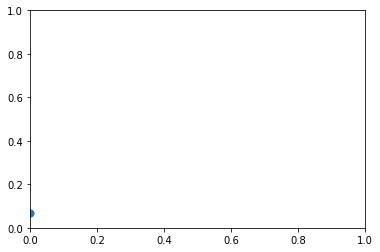

In [1]:
import pyxdf
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import numpy as np
import cv2

# Load the .xdf file
file_path = './pilot2/raw/sangsu/sangsu_VR.xdf'
streams, header = pyxdf.load_xdf(file_path)

# Find the stream containing lip tracking data
lip_stream = None
for stream in streams:
    if "lip" in stream['info']['name'][0].lower():  # Assumes "lip" is in the name
        lip_stream = stream
        break

if not lip_stream:
    raise ValueError("No stream containing 'lip' data found in the .xdf file.")

# Extract lip tracking data (e.g., x, y coordinates)
timestamps = np.array(lip_stream['time_stamps'])
lip_data = np.array(lip_stream['time_series'])  # Assuming 2D (x, y) or 3D (x, y, z) data

# Normalize data for visualization
lip_data_normalized = (lip_data - np.min(lip_data, axis=0)) / (np.max(lip_data, axis=0) - np.min(lip_data, axis=0))

# Create a real-time animation
fig, ax = plt.subplots()
scat = ax.scatter([], [], s=50)

def init():
    ax.set_xlim(0, 1)  # Normalized range for x
    ax.set_ylim(0, 1)  # Normalized range for y
    return scat,

def update(frame):
    x, y = lip_data_normalized[frame, :2]  # Extract x, y for the current frame
    scat.set_offsets([x, y])
    return scat,

ani = FuncAnimation(fig, update, frames=len(lip_data_normalized), init_func=init, interval=30, blit=True)

# Save animation as video
ani.save("./pilot2/processed/lip_tracking.mp4", writer='ffmpeg', fps=30)
plt.show()